## Pooling

In this section we will look at pooling used in CNNs

In [1]:
#This segment verifies the setup
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"



# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from sklearn.datasets import load_sample_image


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#Functions for showing BW images
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

#Function to show color image
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    
#The cropping image function
def crop(images):
    return images[150:220, 130:250]

In [3]:
from sklearn.datasets import load_sample_image

# Load sample images
china_original=load_sample_image("china.jpg")


china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

print (images.shape)


(2, 427, 640, 3)


### Max Pool

The most commonly used pooling method. It is a convolution method that gives the pixel with the maximum value. Intuitively it can be seen as highlighting the most important feature in that receptive field

In [27]:
#Keras provides an easy API for creating a maxpool layer. Note here the pool size is 2
max_pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=6)
output_max_pool = max_pool(images)

In [28]:
#Create pooled output
output_max_pool = max_pool(images)
print (images.shape)
print (output_max_pool.shape)

(2, 427, 640, 3)
(2, 71, 107, 3)


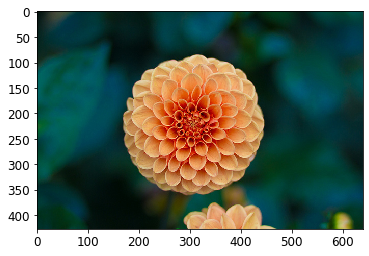

In [29]:
plt.imshow(images[1])

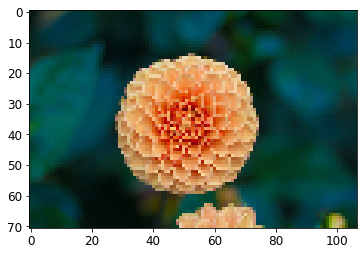

In [31]:
plt.imshow(output_max_pool[1])

### Average Pooling

In average pooling the output pixel has the average of the receptive field. Fewer models use this nowadays. Intuitively it gives a summary of the receptive field

In [32]:
#Ready made keras API to create an average pool
avg_pool = keras.layers.AvgPool2D(pool_size=6)

In [33]:
output_avg_pool = avg_pool(images)
print (images.shape)
print (output_avg_pool.shape)

(2, 427, 640, 3)
(2, 71, 106, 3)


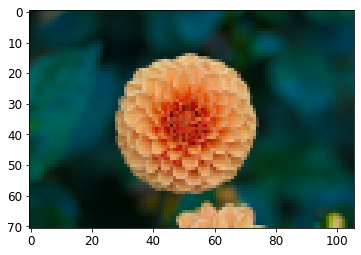

In [34]:
plt.imshow(output_avg_pool[1])

### Global Average Pooling

A rarely used pooling. It averages out all rows and columns giving a single value along the channel

In [28]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
output_global_avg_pool = global_avg_pool(images)
print (images.shape)
print (output_global_avg_pool.shape)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(2, 427, 640, 3)
(2, 3)


In [30]:
print (output_global_avg_pool)

tf.Tensor(
[[0.56767327 0.5706355  0.5528319 ]
 [0.21627817 0.28856644 0.2232219 ]], shape=(2, 3), dtype=float32)


Note we have lost all the detail along height and width and we have 1 value for all pixels in each channel.

The same function can be implemented by running a mean across the height and width axes

In [34]:
#Averaging using a lambda function specifying the axes along height and width
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
print (output_global_avg2(images))



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[0.56767327 0.5706355  0.5528319 ]
 [0.21627817 0.28856644 0.2232219 ]], shape=(2, 3), dtype=float32)


Note the output is the same with both the methods